In [13]:
import pickle


def l2norm(list1, list2):
    l2_norm_difference = sum((x - y) ** 2 for x, y in zip(list1, list2)) ** 0.5
    l2_norm_reference = sum(y**2 for y in list1) ** 0.5
    return l2_norm_difference / l2_norm_reference


def get_record(cnum, dataset, model, setup):
    rec_path = f"./rec_fed_sample_time/{model}_model_{cnum}_{dataset}_{setup}.rec"
    with open(rec_path, "rb") as res_file:
        record = pickle.load(res_file)
    return record

In [14]:
import os

from tqdm import tqdm
from helper_alg import IPSS_SHAP, MC_Random_SHAP, CC_Random_SHAP, DEF_SHAP

cnum = 10 # 3 6 10
dataset = "emnist"
model = "cnn" # cnn linear
setup = "same"
setting = (cnum, dataset, model, setup)

record = get_record(cnum, dataset, model, setup)
exact = DEF_SHAP(record, cnum, False)[0]
algs = {"MC-Random": MC_Random_SHAP, "CC-Random": CC_Random_SHAP}
data_filepath = f"variance/data_{cnum}_{model}_{dataset}_{setup}.pk"
data = {}
times = 100

if os.path.exists(data_filepath):
    with open(data_filepath, "rb") as data_file:
        data = pickle.load(data_file)
else:
    for alg in algs:
        tmp = []
        for gamma in tqdm(range(1, 2**cnum + 1), desc=alg):
            for i in range(times):
                acc, loss, acc_time, loss_time = algs[alg](record, cnum, gamma, False)
                tmp.append((gamma, acc_time, l2norm(exact, acc)))
        data[alg] = tmp
    with open(data_filepath, "wb") as f:
        pickle.dump(data, f)

data

CC-Random: 100%|██████████| 1024/1024 [14:13<00:00,  1.20it/s]


{'MC-Random': [(1, 17.41490694321692, 1.0),
  (1, 18.806728780269623, 1.0),
  (1, 18.14787667989731, 1.0),
  (1, 18.921031353995204, 1.0),
  (1, 18.949671803042293, 1.0),
  (1, 17.963737666606903, 1.0),
  (1, 18.24840046092868, 1.0),
  (1, 18.35691273212433, 1.0),
  (1, 18.698957646265626, 1.0),
  (1, 18.73955717124045, 1.0),
  (1, 18.84361771121621, 1.0),
  (1, 18.43488048389554, 1.0),
  (1, 18.425529001280665, 1.0),
  (1, 18.39486888423562, 1.0),
  (1, 19.322749983519316, 1.0),
  (1, 17.84619752317667, 1.0),
  (1, 18.958132779225707, 1.0),
  (1, 18.32235267572105, 1.0),
  (1, 18.768520472571254, 1.0),
  (1, 19.059872590005398, 1.0),
  (1, 18.065059723332524, 1.0),
  (1, 18.176585579290986, 1.0),
  (1, 18.27177377976477, 1.0),
  (1, 17.87416740693152, 1.0),
  (1, 18.65154197253287, 1.0),
  (1, 18.370968028903008, 1.0),
  (1, 17.921117881312966, 1.0),
  (1, 17.480991546064615, 1.0),
  (1, 18.16036008670926, 1.0),
  (1, 18.857741439715028, 1.0),
  (1, 18.863419502973557, 1.0),
  (1, 18.

In [15]:
import matplotlib.pylab as plt

# plt.style.use("ggplot")
# plt.rcParams["axes.prop_cycle"]
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"

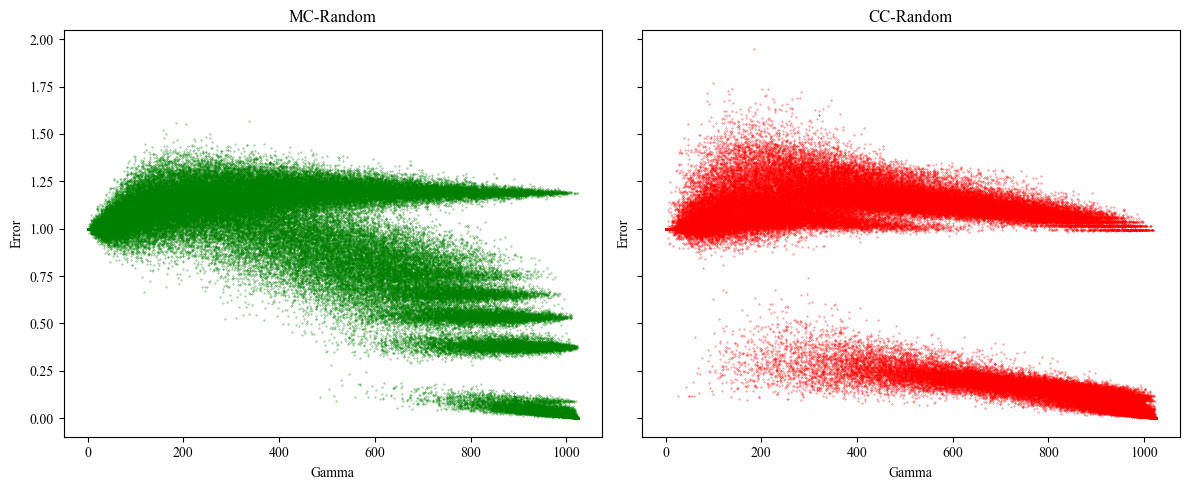

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes: list[plt.Axes]

colors = ["green", "red"]

for i, alg in enumerate(algs.keys()):
    gamma, time, error = zip(*data[alg])
    
    axes[i].scatter(gamma, error, s=0.1, color=colors[i], alpha=0.7)
    axes[i].set_xlabel("Gamma")
    axes[i].set_ylabel("Error")
    axes[i].set_title(alg)

plt.tight_layout()
plt.show()

In [17]:
import numpy as np


gammas = list(range(1, 2**cnum + 1))
variances = {}
for alg, alg_data in data.items():
    errors = {gamma: [] for gamma in gammas}
    for gamma, time, error in alg_data:
        errors[gamma].append(error)
    variances[alg] = [np.var(errors[gamma]) for gamma in gammas]

variances

{'MC-Random': [0.0,
  6.252549780735264e-06,
  8.777378308670801e-06,
  4.2361780810132065e-08,
  1.15483092696678e-05,
  2.6580946593201663e-05,
  0.00014512555100780548,
  7.821017838965497e-05,
  0.00010407022447085867,
  9.171719974183673e-05,
  0.00014914213549393473,
  0.0002090435934435597,
  0.00021921830494469778,
  0.00020724481988804505,
  0.0003242068721613389,
  0.00033628492237193464,
  0.0003740665740967375,
  0.0004204473683473523,
  0.0005952244399445475,
  0.0007142235697752446,
  0.00044592001868335845,
  0.0009187237322335128,
  0.0006495758856953943,
  0.000750579127876965,
  0.0006857350366693574,
  0.0005141947066937301,
  0.001161639678026627,
  0.0011975519066364803,
  0.0009887554584493575,
  0.0017046495273531882,
  0.0009317464940271396,
  0.0014377071836275221,
  0.0015219317843967399,
  0.0012908642865255022,
  0.001786481972188048,
  0.0017584658298891909,
  0.0020426181444350923,
  0.0025347301573070986,
  0.001801830849827723,
  0.0022484759403673202,
 

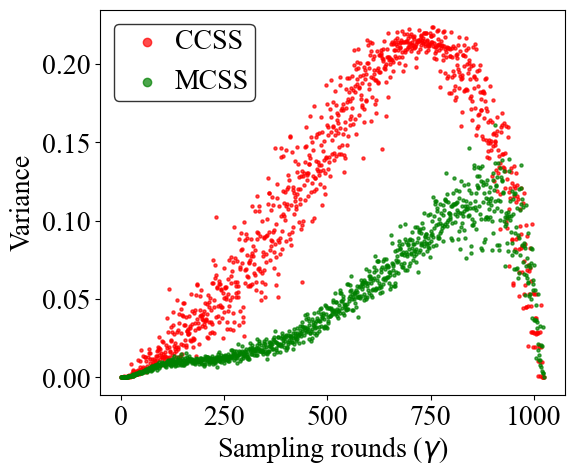

In [18]:
import math
import matplotlib.pyplot as plt

fontsize = 20
labelsize = 20
colors = {"IPSS": "blue", "MC-Random": "green", "CC-Random": "red"}
labels = {"IPSS": "IPSS", "MC-Random": "MCSS", "CC-Random": "CCSS"}
dot_size = {10: 5, 6: 10, 3: 50}[cnum]

plt.figure(figsize=(6, 5))
for alg in ["CC-Random", "MC-Random"]:
    plt.scatter(gammas, variances[alg], s=dot_size, label=labels[alg], color=colors[alg], alpha=0.7)

plt.xlabel("Sampling rounds ($\gamma$)", fontsize=fontsize)
plt.ylabel("Variance", fontsize=fontsize)
plt.tick_params(axis="both", labelsize=labelsize)
plt.legend(
    fontsize=labelsize,
    frameon=True,
    edgecolor="black",
    borderpad=0.2,
    handletextpad=0,
    markerscale=6 / math.sqrt(dot_size),
)
plt.savefig(f"figs/variance/variance_{cnum}_{model}_{dataset}_{setup}.png", bbox_inches="tight")
plt.show()